In [3]:
import pandas as pd
df = pd.read_csv("../dataset/fashion_demand_forecasting_dataset.csv")

In [4]:
print(df.isnull().sum())

Product_ID                 0
Date                       0
Category                   0
Size                       0
Color                      0
Brand                      0
Material                   0
Price                      0
Units_Sold                 0
Revenue                    0
Stock_Levels               0
Reorder_Frequency          0
Customer_Reviews           0
Discount_Percentage        0
Supplier_Lead_Time         0
Shipping_Time              0
Return_Rate                0
Website_Traffic            0
Social_Media_Engagement    0
Competitor_Pricing         0
dtype: int64


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product_ID               10000 non-null  object 
 1   Date                     10000 non-null  object 
 2   Category                 10000 non-null  object 
 3   Size                     10000 non-null  object 
 4   Color                    10000 non-null  object 
 5   Brand                    10000 non-null  object 
 6   Material                 10000 non-null  object 
 7   Price                    10000 non-null  float64
 8   Units_Sold               10000 non-null  int64  
 9   Revenue                  10000 non-null  float64
 10  Stock_Levels             10000 non-null  int64  
 11  Reorder_Frequency        10000 non-null  int64  
 12  Customer_Reviews         10000 non-null  float64
 13  Discount_Percentage      10000 non-null  int64  
 14  Supplier_Lead_Time     

In [6]:
print(df.describe())

              Price    Units_Sold       Revenue  Stock_Levels  \
count  10000.000000  10000.000000  10000.000000  10000.000000   
mean      50.127681     22.017800   1110.421754    247.783500   
std       19.710251     12.322981    805.467503     98.264142   
min       10.000000      1.000000     21.990000     50.000000   
25%       36.547500     14.000000    554.590000    178.000000   
50%       50.080000     18.000000    910.095000    247.000000   
75%       63.680000     27.000000   1412.607500    316.000000   
max      149.270000     76.000000   6193.500000    500.000000   

       Reorder_Frequency  Customer_Reviews  Discount_Percentage  \
count       10000.000000      10000.000000         10000.000000   
mean           14.552600          3.984250             9.902500   
std             4.797263          0.489208            13.160749   
min             5.000000          2.500000             0.000000   
25%            11.000000          3.600000             0.000000   
50%         

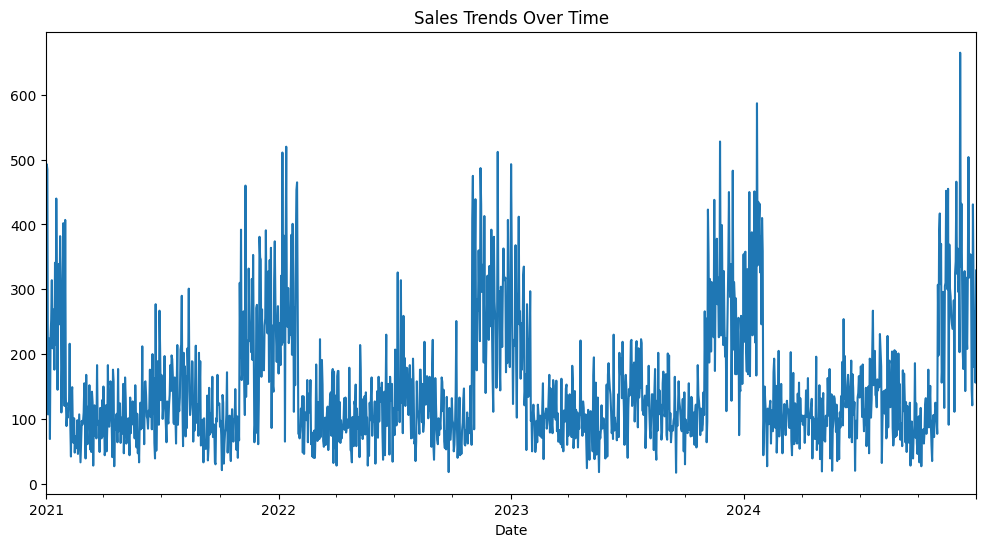

In [7]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is in datetime format
df.groupby('Date')['Units_Sold'].sum().plot(figsize=(12, 6), title="Sales Trends Over Time")
plt.show()

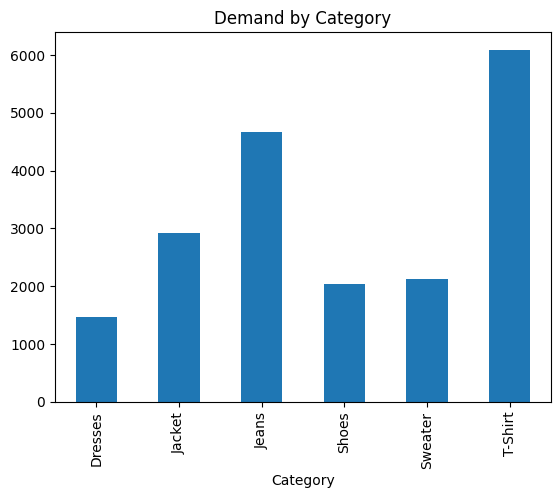

In [10]:
df.groupby('Category')['Units_Sold'].sum().plot(kind='bar', title="Demand by Category")
plt.show()

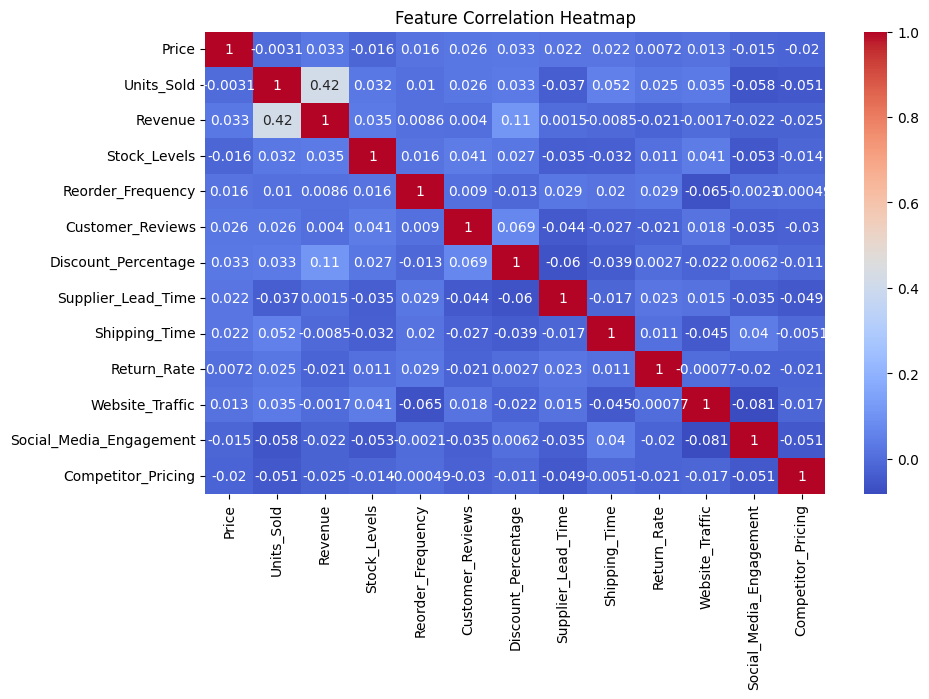

In [12]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Extract temporal features (month, season, weekday)

In [8]:
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday


In [9]:
df['Prev_Day_Sales'] = df['Units_Sold'].shift(1)

In [10]:
df = pd.get_dummies(df, columns=['Category', 'Size', 'Color', 'Brand', 'Material'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = df[['Price', 'Stock_Levels', 'Reorder_Frequency']]  # Select features
y = df['Units_Sold']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, predictions)}")


MAE: 9.454982873495734


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = df[['Price', 'Stock_Levels', 'Reorder_Frequency']]  # Features
y = df['Units_Sold']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, predictions)}")


MAE: 10.14945
